# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {MASHAKO JUSTICE MANYELO}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

# Predict Overview: Climate Change Sentiment Analysis

## Project Overview



# Table of Contents

1. [Project Overview](#project-overview)
2. [Step 1: Import Necessary Libraries](#step-1-import-necessary-libraries)
3. [Step 2: Load the Dataset](#step-2-load-the-dataset)
4. [Step 3: Explore the Dataset](#step-3-explore-the-dataset)
5. [Step 4: Preprocess the Text Data](#step-4-preprocess-the-text-data)
6. [Step 5: Split the Dataset into Training and Testing Sets](#step-5-split-the-dataset-into-training-and-testing-sets)
7. [Step 6: Build a Basic Classification Model](#step-6-build-a-basic-classification-model)
8. [Step 7: Evaluate the Model on the Test Set](#step-7-evaluate-the-model-on-the-test-set)
9. [Step 8: Cross-Validation for Model Evaluation](#step-8-cross-validation-for-model-evaluation)
10. [Step 9: Predict Sentiments for the Provided Test Dataset](#step-9-predict-sentiments-for-the-provided-test-dataset)
11. [Step 10: Prepare the Submission File](#step-10-prepare-the-submission-file)

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| Description: Importing Packages |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
import time
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
import re
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from comet_ml import Experiment
from comet_ml.integration.sklearn import log_model
from comet_ml import Experiment
from sklearn.metrics import confusion_matrix, classification_report
from nltk.stem import PorterStemmer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer


<a id="two"></a>
## Step 2: Load the Dataset
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| Description: Loading the data |
| :--------------------------- |
| Replace 'your_dataset.csv' with the actual file path or URL. |

---

In [3]:
# Load training data
train_data = pd.read_csv("https://raw.githubusercontent.com/MashakoJustice/South_African_Languege_Classification/main/train_set.csv")

# Load test data without labels
test_data = pd.read_csv("https://raw.githubusercontent.com/MashakoJustice/South_African_Languege_Classification/main/test_set.csv")

<a id="three"></a>
## Step 3: Explore the Dataset
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| Description: Exploratory data analysis |
| :--------------------------- |
| Display basic information about the dataset. |

---


In [4]:
# Display the first few rows of the training data
train_data.head()


,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [5]:

# Check the columns present in the training data
train_data.columns


Index(['lang_id', 'text'], dtype='object')

In [6]:

# Check the data types of each column
train_data.dtypes


lang_id    object
text       object
dtype: object

In [7]:

# Check for missing values in the training data
train_data.isnull().sum()



lang_id    0
text       0
dtype: int64

In [8]:

# Summary statistics for numerical columns
train_data.describe()


,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


In [9]:

# Count of unique values in each column
train_data.nunique()


lang_id       11
text       29948
dtype: int64

In [10]:

# Count of samples for each language
train_data['lang_id'].value_counts()


lang_id
xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: count, dtype: int64

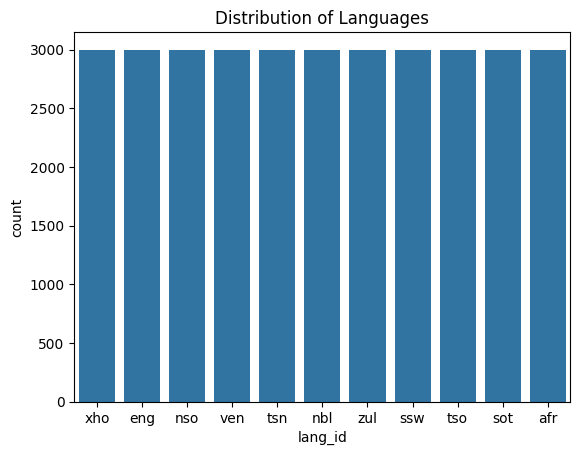

In [11]:

sns.countplot(x='lang_id', data=train_data)
plt.title('Distribution of Languages')
plt.show()


In [12]:
# Display the first few rows of the test data
test_data.head()



,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [13]:

# Check the columns present in the test data
test_data.columns


Index(['index', 'text'], dtype='object')

In [14]:

# Check the data types of each column
test_data.dtypes


index     int64
text     object
dtype: object

In [15]:

# Check for missing values in the test data
test_data.isnull().sum()


index    0
text     0
dtype: int64

In [16]:

# Summary statistics for numerical columns (if any)
test_data.describe()


,index
count,5682.000000
mean,2841.500000
std,1640.396446
min,1.000000
25%,1421.250000
50%,2841.500000
75%,4261.750000
max,5682.000000


In [17]:

# Count of unique values in each column
test_data.nunique()


index    5682
text     5459
dtype: int64

<a id="four"></a>
## Step 4: Preprocess the Text Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| Description: Data engineering |
| :--------------------------- |
| Perform text cleaning, handling missing values, etc... |

---

<a id="five"></a>
## Step 5: Split the Dataset into Training and Testing Sets
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| Description: Modelling |
| :--------------------------- |
| In this step, we divide our dataset into two subsets: a training set and a testing set. |

---

In [30]:
# Assuming train_data is your DataFrame and you have features (X) and target variable (y)
# Replace 'features' and 'lang_id' with the actual columns in your dataset
X = train_data['text']
y = train_data['lang_id']

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (29700,)
X_test shape: (3300,)
y_train shape: (29700,)
y_test shape: (3300,)


<a id="six"></a>
## Step 6: Build a Basic Classification Model
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| Description: Model performance |
| :--------------------------- |
| Start with a simple model. We will add more as we go. |

---

In [32]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create pipelines with placeholder parameters for hyperparameter tuning
nb_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])
lr_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

# Create parameter grids for hyperparameter tuning
param_grid_nb = {
    'clf__alpha': [0.1, 0.5, 1.0, 2.0]
}

param_grid_lr = {
    'clf__C': [0.1, 1, 10],
    'clf__multi_class': ['ovr', 'multinomial'],
    'clf__solver': ['saga']
}

# Create dictionaries for classifiers and their corresponding parameter grids
classifiers = {
    'Naive Bayes': (nb_pipeline, param_grid_nb),
    'Logistic Regression': (lr_pipeline, param_grid_lr)
}

results = []

for clf_name, (clf, param_grid) in classifiers.items():
    print(f"Training and tuning hyperparameters for {clf_name}...")
    
    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

    # Perform the grid search
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Print the best hyperparameters
    print(f"Best Hyperparameters for {clf_name}: {best_params}")

    # Fit the best model on the entire training set
    best_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {clf_name}: {accuracy:.4f}\n")

    # Save the results
    results.append([clf_name, accuracy, best_params])

# Display the results
for result in results:
    print(result[0], "Accuracy:", result[1])
    print("Best Hyperparameters:", result[2])
    print("="*50)


Training and tuning hyperparameters for Naive Bayes...
Best Hyperparameters for Naive Bayes: {'clf__alpha': 0.1}
Accuracy for Naive Bayes: 0.9994

Training and tuning hyperparameters for Logistic Regression...
Best Hyperparameters for Logistic Regression: {'clf__C': 10, 'clf__multi_class': 'multinomial', 'clf__solver': 'saga'}
Accuracy for Logistic Regression: 0.9967

Naive Bayes Accuracy: 0.9993939393939394
Best Hyperparameters: {'clf__alpha': 0.1}
Logistic Regression Accuracy: 0.9966666666666667
Best Hyperparameters: {'clf__C': 10, 'clf__multi_class': 'multinomial', 'clf__solver': 'saga'}


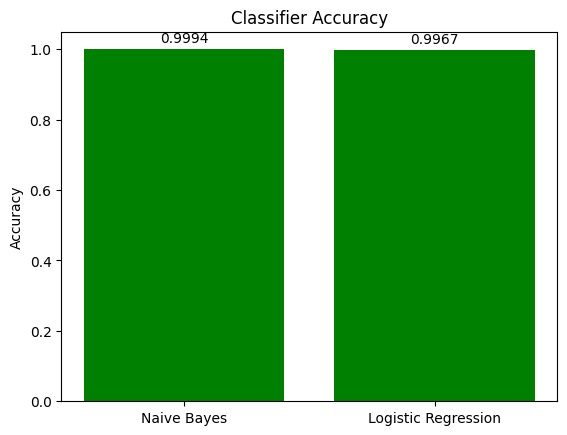

In [33]:
# Extract the classifier names and accuracies from the results
classifier_names = [result[0] for result in results]
accuracies = [result[1] for result in results]

# Plot the bar graph
fig, ax = plt.subplots()
ax.bar(classifier_names, accuracies, color='green')

# Add labels and title
ax.set_ylabel('Accuracy')
ax.set_title('Classifier Accuracy')

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    ax.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

# Show the plot
plt.show()

<a id="seven"></a>
## Step 7: Evaluate the Model on the Test Set
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| Description: Model explanation |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way. |

---

In [36]:
# Evaluate the models on the test set
test_results = []
test_confusion_matrices = {}
test_class_reports = {}

for clf_name, (clf, _) in classifiers.items():
    print(f"Evaluating {clf_name} on the test set...")

    # Fit the entire pipeline on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_test_pred = clf.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    report_test = classification_report(y_test, y_test_pred)
    confusion_mat_test = confusion_matrix(y_test, y_test_pred)

    print(f"\n{clf_name} Test Set Classification Report:\n")
    print(f"Accuracy: {accuracy_test:.4f}\n")
    print(report_test)
    print("="*50)

    # Save the results to dictionaries
    test_confusion_matrices[clf_name] = confusion_mat_test
    test_class_reports[clf_name] = report_test

    test_results.append([clf_name, accuracy_test, report_test])

# Display the results in the specified format
for result in test_results:
    print(result[0], "Test Set Accuracy:", result[1])
    print(result[2])
    print("="*50)


Evaluating Naive Bayes on the test set...

Naive Bayes Test Set Classification Report:

Accuracy: 0.9988

              precision    recall  f1-score   support

         afr       0.99      1.00      1.00       281
         eng       1.00      1.00      1.00       297
         nbl       1.00      1.00      1.00       327
         nso       1.00      1.00      1.00       322
         sot       1.00      1.00      1.00       307
         ssw       1.00      1.00      1.00       286
         tsn       1.00      1.00      1.00       297
         tso       1.00      1.00      1.00       253
         ven       1.00      1.00      1.00       322
         xho       1.00      1.00      1.00       313
         zul       1.00      1.00      1.00       295

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300

Evaluating Logistic Regression on the test set...


c:\Users\Just-ice\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Test Set Classification Report:

Accuracy: 0.9948

              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       281
         eng       1.00      1.00      1.00       297
         nbl       0.99      0.99      0.99       327
         nso       1.00      0.99      0.99       322
         sot       1.00      1.00      1.00       307
         ssw       0.98      0.99      0.99       286
         tsn       1.00      1.00      1.00       297
         tso       1.00      1.00      1.00       253
         ven       1.00      1.00      1.00       322
         xho       0.99      1.00      0.99       313
         zul       0.98      0.99      0.99       295

    accuracy                           0.99      3300
   macro avg       0.99      0.99      0.99      3300
weighted avg       0.99      0.99      0.99      3300

Naive Bayes Test Set Accuracy: 0.9987878787878788
              precision    recall  f1-score   support

         a

<a id="seven"></a>
## Step 8: Cross-Validation for Model Evaluation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| Description: Model explanation |
| :--------------------------- |
| Ensure the model's robustness. |

---

In [39]:
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# import numpy as np

# # Define the number of folds
# num_folds = 5

# # Perform cross-validation for each classifier
# cv_results = []
# cv_confusion_matrices = {}
# cv_class_reports = {}

# for clf_name, (clf, _) in classifiers.items():
#     print(f"Performing cross-validation for {clf_name}...")
    
#     # Create a StratifiedKFold object for better class distribution in each fold
#     skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    
#     # Perform cross-validation
#     cv_scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')
    
#     print(f"{clf_name} Cross-Validation Scores: {cv_scores}")
#     print(f"Mean Accuracy: {np.mean(cv_scores):.4f}\n")
    
#     # Save the results to dictionaries
#     cv_results.append([clf_name, np.mean(cv_scores)])

# # Display the cross-validation results
# cv_results_df = pd.DataFrame(cv_results, columns=['Classifier', 'Mean Accuracy'])
# cv_results_df.set_index('Classifier', inplace=True)
# print(cv_results_df)



<a id="seven"></a>
## Step 9: Predict Lang ID for the Provided Test Dataset
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| Description: Model explanation |
| :--------------------------- |
| Replace 'your_test_dataset.csv' with the actual file path or URL. |

---

In [41]:
# Assuming 'text' is the column containing the text data in the test set
X_test_data = test_data['text']

# Use the trained Naive Bayes classifier to make predictions
naive_bayes_clf = classifiers['Naive Bayes'][0]  # Access the first element of the tuple
X_test_transformed = naive_bayes_clf.named_steps['tfidf'].transform(X_test_data)
naive_bayes_predictions = naive_bayes_clf.named_steps['clf'].predict(X_test_transformed)

# Create a DataFrame for submission
submission_df = pd.DataFrame({'index': test_data['index'], 'lang_id': naive_bayes_predictions})

# Display the updated submission DataFrame
print(submission_df)


      index lang_id
0         1     tsn
1         2     nbl
2         3     ven
3         4     ssw
4         5     afr
...     ...     ...
5677   5678     eng
5678   5679     nso
5679   5680     sot
5680   5681     sot
5681   5682     tso

[5682 rows x 2 columns]


In [ ]:

#     # Flatten the predictions array if it's 2D
#     predictions = predictions.flatten() if len(predictions.shape) > 1 else predictions
    
#     # Add predictions to the DataFrame
#     predictions_df[clf_name] = predictions

# # Extract the predictions from the 'Naive Bayes' column
# naive_bayes_predictions = predictions_df['Naive Bayes']

# # Create a DataFrame for submission
# submission_df = pd.DataFrame({'index': test_data['index'], 'lang_id': naive_bayes_predictions})

# # Display the updated submission DataFrame
# print(submission_df)




<a id="seven"></a>
## Step 10: Prepare the Submission File
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| Description: Model explanation |
| :--------------------------- |
| In this final step, we prepare the submission file that aligns with the requirements for the project. |

---

In [ ]:
submission_df.to_csv('Final_prediction_just.csv', index=False)
